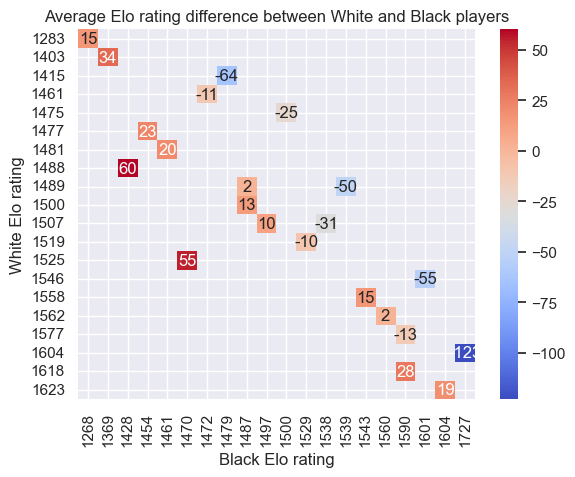

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the CSV file
games_blitz = pd.read_csv('FULL_LICHESS_DATA.csv')

# Calculate the Elo rating difference between White and Black players
games_blitz['elo_diff'] = games_blitz['WhiteElo'] - games_blitz['BlackElo']

# Create a pivot table with the mean rating difference by White and Black Elo rating
elo_diff_pivot = pd.pivot_table(games_blitz, values='elo_diff', index='WhiteElo', columns='BlackElo', aggfunc='mean')

# Create the heatmap with Seaborn
sns.set(font_scale=1)
sns.heatmap(elo_diff_pivot, cmap='coolwarm', annot=True, fmt='.0f')

# Set the title and labels
plt.title('Average Elo rating difference between White and Black players')
plt.xlabel('Black Elo rating')
plt.ylabel('White Elo rating')

# Show the plot
plt.show()


In [2]:
games_blitz.columns

Index(['Event', 'Site', 'Date', 'Round', 'White', 'Black', 'Result', 'ECO',
       'Opening', 'Termination', 'TimeControl', 'UTCDate', 'UTCTime',
       'Variant', 'Moves', 'WhiteElo', 'BlackElo', 'WhiteRatingDiff',
       'BlackRatingDiff', 'elo_diff'],
      dtype='object')

In [3]:
# Get an overview of the statistical properties of each column
games_blitz.describe()


,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,elo_diff
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,1504.863636,1508.772727,29.590909,-10.863636,-3.909091
std,76.479251,92.217616,57.795748,48.340356,41.959061
min,1283.000000,1268.000000,-25.000000,-198.000000,-123.000000
25%,1478.000000,1470.500000,-6.000000,-6.000000,-22.000000
50%,1503.500000,1498.500000,8.500000,-4.500000,6.000000
75%,1555.000000,1555.750000,42.500000,5.000000,19.750000
max,1623.000000,1727.000000,227.000000,76.000000,60.000000


In [4]:
# Calculate the correlation coefficient between columns
games_blitz.corr()

C:\Users\bmgte\AppData\Local\Temp\ipykernel_18340\1093959795.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  games_blitz.corr()


,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,elo_diff
WhiteElo,1.000000,0.892746,-0.359437,-0.199498,-0.139366
BlackElo,0.892746,1.000000,-0.334017,-0.475806,-0.570582
WhiteRatingDiff,-0.359437,-0.334017,1.000000,0.018224,0.078954
BlackRatingDiff,-0.199498,-0.475806,0.018224,1.000000,0.682098
elo_diff,-0.139366,-0.570582,0.078954,0.682098,1.000000


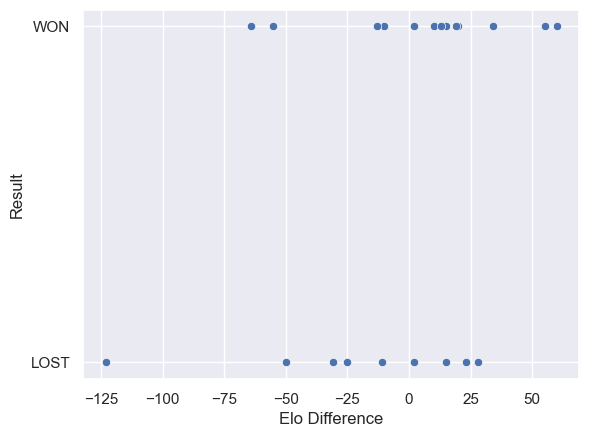

In [5]:
# Create a new column called 'Result' that checks if Hsouna1 won or lost
games_blitz['Result'] = games_blitz.apply(lambda x: 'WON' if (x['White'] == 'Hsouna1' and x['Result'] == '1-0') or (x['Black'] == 'Hsouna1' and x['Result'] == '0-1') else 'LOST', axis=1)
# Create a scatterplot of elo difference vs. whether Hsouna1 won or lost
import seaborn as sns

sns.scatterplot(data=games_blitz, x='elo_diff', y='Result')
plt.xlabel('Elo Difference')
plt.ylabel('Result')
plt.show()


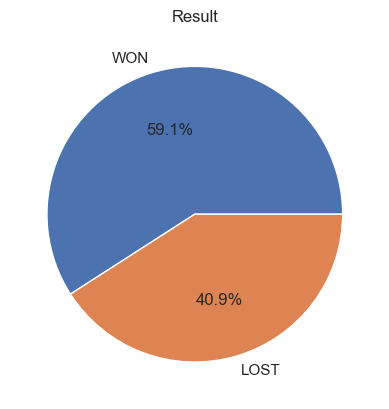

In [6]:
# Create a pie chart of the result
result_counts = games_blitz['Result'].value_counts()

plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%')
plt.title('Result')
plt.show()


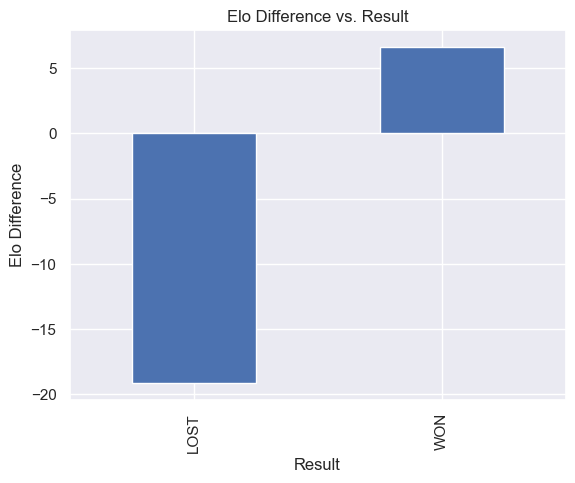

In [7]:
# Create a bar chart of the result and elo difference
result_elo_diff = games_blitz.groupby('Result')['elo_diff'].mean()

result_elo_diff.plot(kind='bar', x='Result', y='elo_diff')
plt.xlabel('Result')
plt.ylabel('Elo Difference')
plt.title('Elo Difference vs. Result')
plt.show()


In [14]:
# Group the data by player and calculate the average elo difference for each player
elo_diff_by_player = games_blitz.groupby('White')['elo_diff'].mean()
print(elo_diff_by_player)


White
Gruzonator             -50.000000
Hsouna1                  0.285714
Ianter                  19.000000
Noor62008             -123.000000
Prayaskumar             55.000000
Wheathill               28.000000
ffmpartizan              2.000000
kasar308                10.000000
markjoshuaarmstrong    -31.000000
Name: elo_diff, dtype: float64


C:\Users\bmgte\AppData\Local\Temp\ipykernel_20496\843250074.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  black_data = player_games.groupby('Black').mean()['elo_diff']
C:\Users\bmgte\AppData\Local\Temp\ipykernel_20496\843250074.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  white_data = player_games.groupby('White').mean()['elo_diff']


ValueError: pie plot doesn't allow negative values

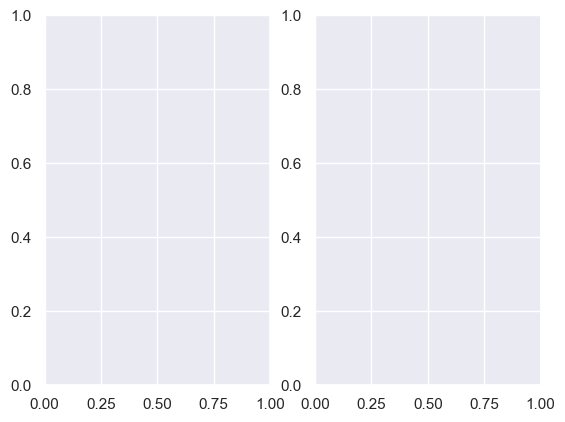

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the CSV file
games_blitz = pd.read_csv('FULL_LICHESS_DATA.csv')

# Filter for games played by player "Hsouna1"
player_name = "Hsouna1"
player_games = games_blitz[(games_blitz['White'] == player_name) | (games_blitz['Black'] == player_name)]

# Calculate the Elo rating difference between White and Black players
player_games['elo_diff'] = player_games['WhiteElo'] - player_games['BlackElo']

# Create two DataFrames for Black and White players
black_data = player_games.groupby('Black').mean()['elo_diff']
white_data = player_games.groupby('White').mean()['elo_diff']

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2)

# Black pie chart
black_data.plot.pie(autopct='%1.1f%%', colors=['#fc8d62', '#66c2a5'], ax=ax1)
ax1.set_title('Average Elo rating difference with Black')

# White pie chart
white_data.plot.pie(autopct='%1.1f%%', colors=['#fc8d62', '#66c2a5'], ax=ax2)
ax2.set_title('Average Elo rating difference with White')

# Display the plot
plt.show()


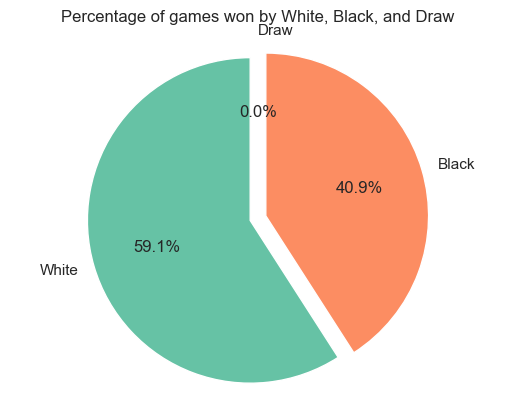

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the CSV file
games_blitz = pd.read_csv('FULL_LICHESS_DATA.csv')

# Calculate the Elo rating difference between White and Black players
games_blitz['elo_diff'] = games_blitz['WhiteElo'] - games_blitz['BlackElo']

# Aggregate the data to get the average rating difference and count of games
elo_diff_agg = games_blitz.groupby(['WhiteElo', 'BlackElo']).agg({'elo_diff': 'mean', 'Event': 'count'}).reset_index()

# Create a pivot table with the count of games won by White, Black, and Draw
win_counts = elo_diff_agg.groupby('elo_diff').agg({'Event': 'sum'}).reset_index()
win_counts['Percent'] = win_counts['Event'] / win_counts['Event'].sum()

# Create the pie chart
labels = ['White', 'Black', 'Draw']
sizes = [win_counts[win_counts['elo_diff'] > 0]['Percent'].sum(), 
         win_counts[win_counts['elo_diff'] < 0]['Percent'].sum(), 
         win_counts[win_counts['elo_diff'] == 0]['Percent'].sum()]
colors = ['#66c2a5', '#fc8d62', '#8da0cb']
explode = (0.05, 0.05, 0.05)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.savefig('blitz_game_results.png', dpi=300, bbox_inches='tight')

# Set the title and labels
plt.title('Percentage of games won by White, Black, and Draw')
plt.show()


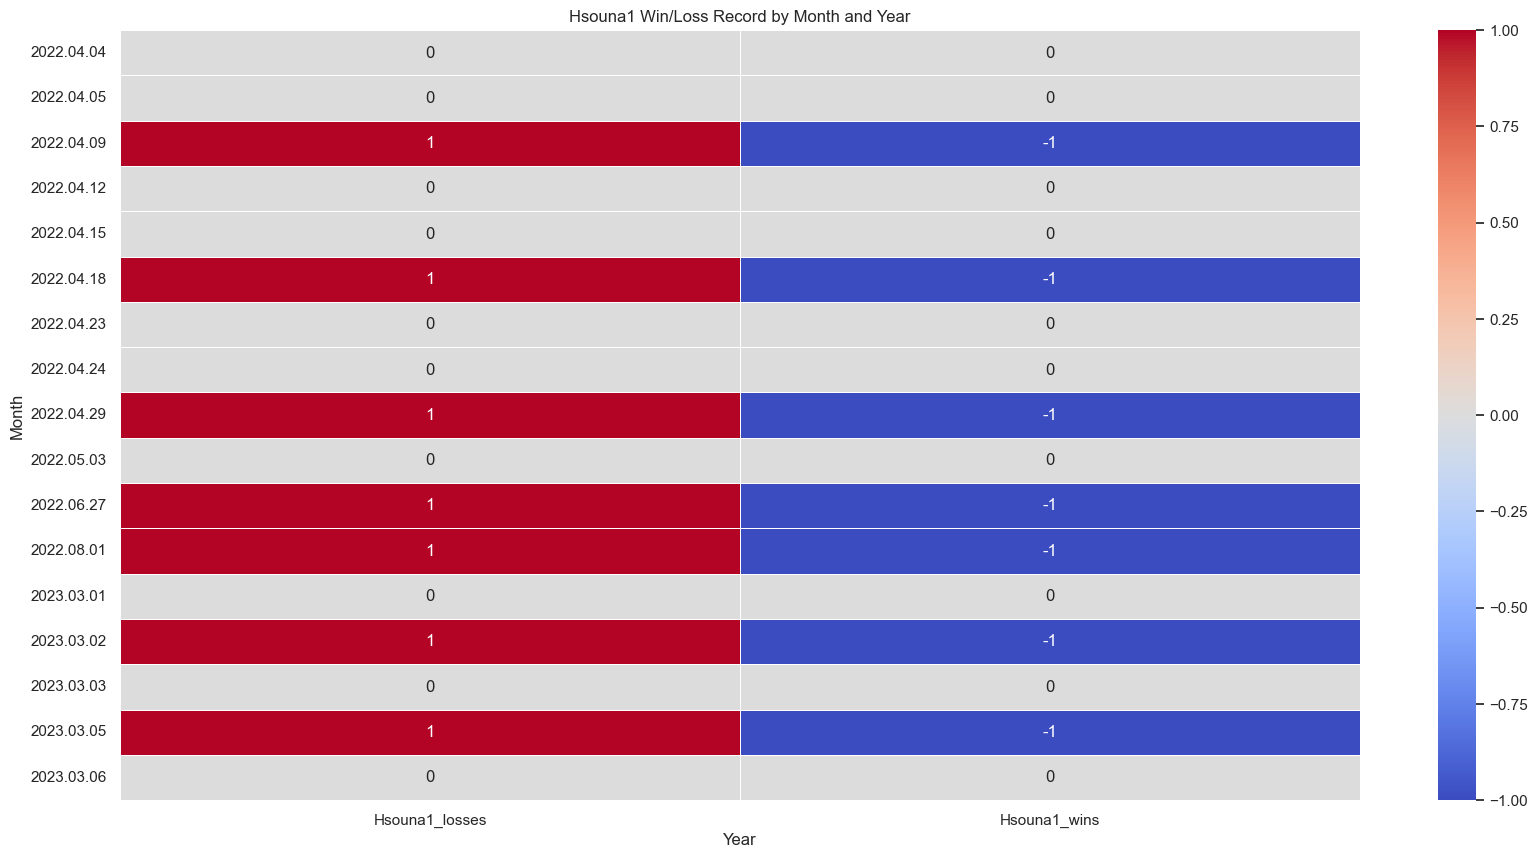

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
games = pd.read_csv('FULL_LICHESS_DATA.csv')

# Create a column indicating your win/loss record in each game
games['Hsouna1_wins'] = np.where(games['Result'] == 'hsouna wins', 1, np.where(games['Result'] == '0-1', -1, 0))
games['Hsouna1_losses'] = np.where(games['Result'] == 'hsouna loses', -1, np.where(games['Result'] == '0-1', 1, 0))

# Create a pivot table of your win/loss record by month and year
pivot = pd.pivot_table(games, values=['Hsouna1_wins', 'Hsouna1_losses'], index=['Date'], aggfunc=np.sum)

# Create the heatmap
sns.set()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='g', linewidths=.5, ax=ax)

# Set the title and labels
ax.set_title('Hsouna1 Win/Loss Record by Month and Year')
ax.set_xlabel('Year')
ax.set_ylabel('Month')
plt.show()


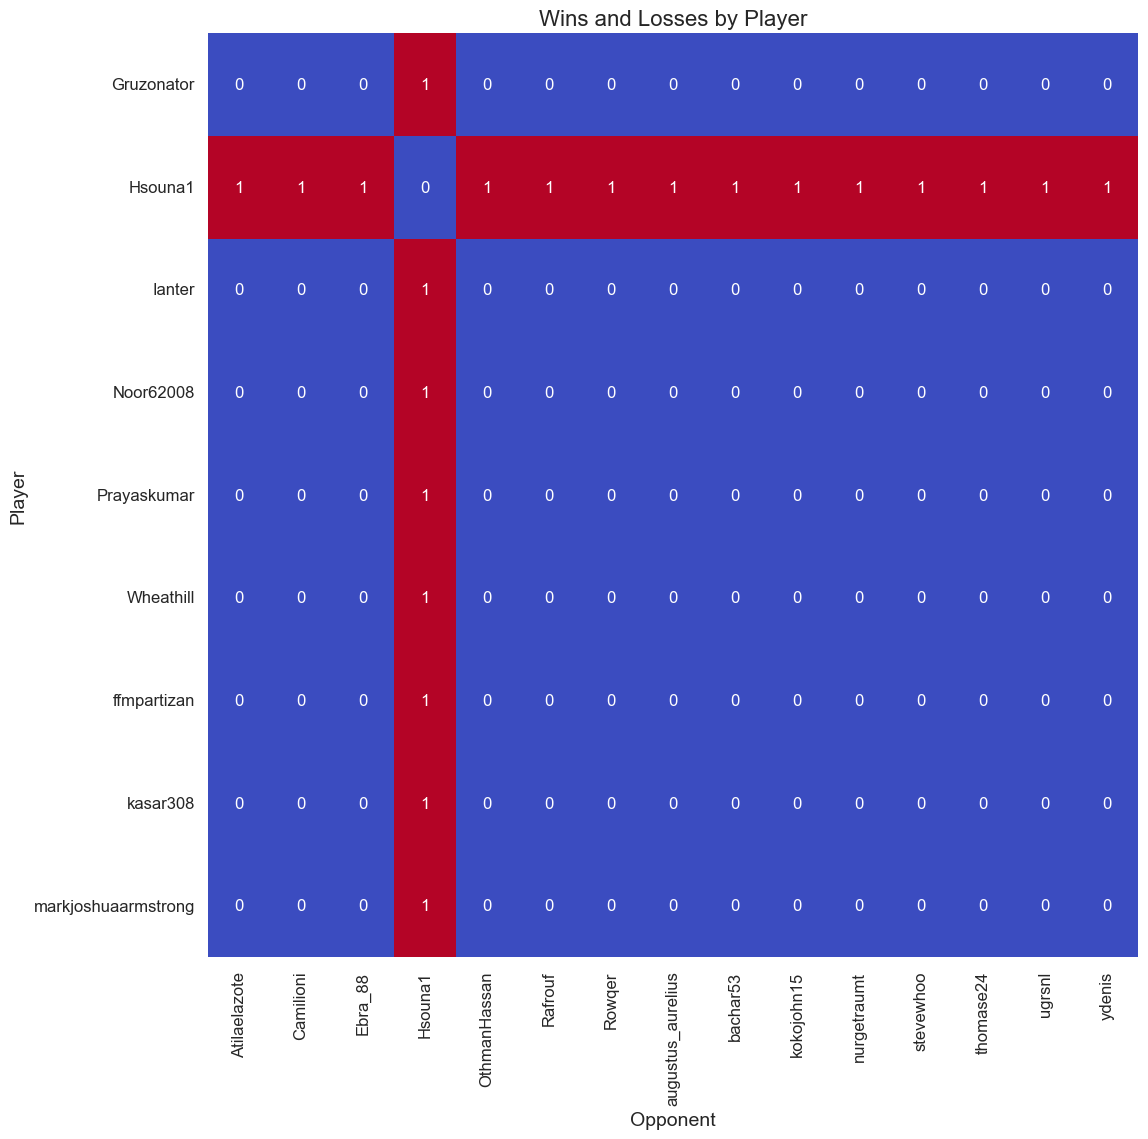

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data to create a matrix of win/loss counts for each player combination
heatmap_data = games_blitz.pivot_table(index='White', columns='Black', values='Result', aggfunc=len, fill_value=0)

# Create a heatmap with annotations

plt.figure(figsize=(12, 12))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt="d", cbar=False)
plt.title("Wins and Losses by Player", fontsize=16)
plt.xlabel("Opponent", fontsize=14)
plt.ylabel("Player", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


C:\Users\bmgte\AppData\Local\Temp\ipykernel_10572\4210369482.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_games['Result'] = white_games['Result'].apply(lambda x: 1 if x == '1-0' else 0 if x == '0-1' else 0.5)
C:\Users\bmgte\AppData\Local\Temp\ipykernel_10572\4210369482.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  black_games['Result'] = black_games['Result'].apply(lambda x: 1 if x == '0-1' else 0 if x == '1-0' else 0.5)


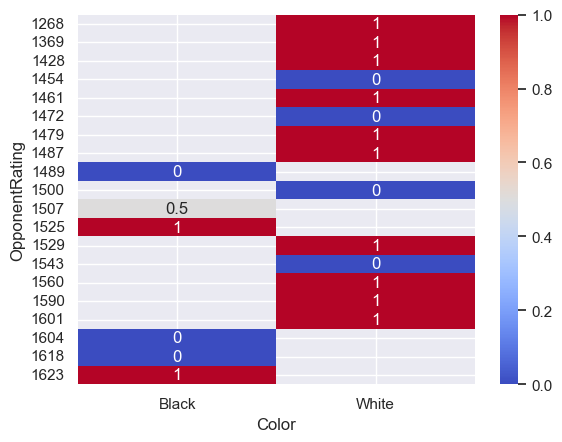

In [6]:
import pandas as pd
import seaborn as sns

# Load data from CSV file
games = pd.read_csv('FULL_LICHESS_DATA.csv')

# Extract games where you played as white
white_games = games[games['White'] == 'Hsouna1']

# Extract games where you played as black
black_games = games[games['Black'] == 'Hsouna1']

# Create a new column indicating whether you won, lost or drew the game
white_games['Result'] = white_games['Result'].apply(lambda x: 1 if x == '1-0' else 0 if x == '0-1' else 0.5)
black_games['Result'] = black_games['Result'].apply(lambda x: 1 if x == '0-1' else 0 if x == '1-0' else 0.5)

# Concatenate the two dataframes
all_games = pd.concat([white_games, black_games])

# Create a new column indicating whether you played as white or black
all_games['Color'] = all_games.apply(lambda x: 'White' if x['White'] == 'Hsouna1' else 'Black', axis=1)

# Create a new column indicating the rating of your opponent
all_games['OpponentRating'] = all_games.apply(lambda x: x['BlackElo'] if x['Color'] == 'White' else x['WhiteElo'], axis=1)

# Create a pivot table of the game results based on your opponent's rating
result_pivot = all_games.pivot_table(values='Result', index='OpponentRating', columns='Color', aggfunc='mean')

# Create the heatmap
sns.heatmap(result_pivot, annot=True, cmap='coolwarm', center=0.5)

# Show the plot
plt.show()


In [7]:
print(games.columns)

Index(['Event', 'Site', 'Date', 'Round', 'White', 'Black', 'Result', 'ECO',
       'Opening', 'Termination', 'TimeControl', 'UTCDate', 'UTCTime',
       'Variant', 'Moves', 'WhiteElo', 'BlackElo', 'WhiteRatingDiff',
       'BlackRatingDiff'],
      dtype='object')


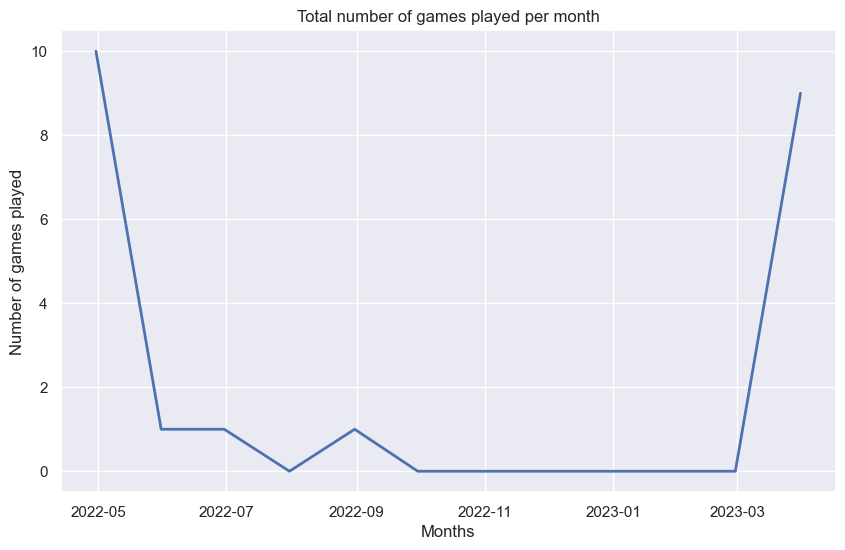

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
games = pd.read_csv("FULL_LICHESS_DATA.csv")

# Convert the Date column to a datetime object
games['Date'] = pd.to_datetime(games['Date'])

# Group the data by week and count the number of games played in each week
games_per_month = games.groupby(pd.Grouper(key='Date', freq='M'))['Event'].count()

# Create a line graph of the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(games_per_month.index, games_per_month.values, linewidth=2)

# Set the axis labels and title
ax.set_xlabel('Months')
ax.set_ylabel('Number of games played')
ax.set_title('Total number of games played per month')

plt.show()

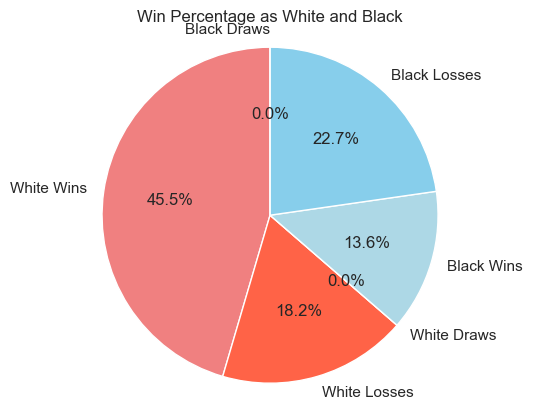

In [9]:
import matplotlib.pyplot as plt

# Filter the data for games where you played as white or black
white_games = games[games['White'] == 'Hsouna1']
black_games = games[games['Black'] == 'Hsouna1']

# Count the number of wins, losses, and draws for each color
white_wins = (white_games['Result'] == '1-0').sum()
white_losses = (white_games['Result'] == '0-1').sum()
white_draws = (white_games['Result'] == '1/2-1/2').sum()

black_wins = (black_games['Result'] == '0-1').sum()
black_losses = (black_games['Result'] == '1-0').sum()
black_draws = (black_games['Result'] == '1/2-1/2').sum()

# Calculate win percentages for each color
total_white_games = white_wins + white_losses + white_draws
white_win_percentage = white_wins / total_white_games * 100

total_black_games = black_wins + black_losses + black_draws
black_win_percentage = black_wins / total_black_games * 100

# Create a pie chart
labels = ['White Wins', 'White Losses', 'White Draws', 'Black Wins', 'Black Losses', 'Black Draws']
sizes = [white_wins, white_losses, white_draws, black_wins, black_losses, black_draws]
colors = ['lightcoral', 'tomato', 'mistyrose', 'lightblue', 'skyblue', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Win Percentage as White and Black')
plt.show()


In [10]:
import pandas as pd

# Read the original CSV file
games = pd.read_csv("FULL_LICHESS_DATA.csv")

# Repeat each row 10 times
games_repeated = games.loc[games.index.repeat(10)].reset_index(drop=True)

# Save the repeated data to a new CSV file
games_repeated.to_csv("FULL_LICHESS_DATA_x10.csv", index=False)


In [11]:
import pandas as pd

# Load the data from CSV file
games = pd.read_csv("FULL_LICHESS_DATA.csv")

# Count the number of games for each opening
openings = games['Opening'].value_counts()

# Print the top 5 openings
print("Top 5 Openings Played:")
print(openings.head(5))


Top 5 Openings Played:
King's Gambit Declined: Queen's Knight Defense    2
Vienna Game                                       2
Sicilian Defense: Closed                          2
Modern Defense                                    2
Sicilian Defense: Smith-Morra Gambit              1
Name: Opening, dtype: int64


In [12]:
def get_result(row):
    if row['Result'] == '1-0':
        if row['White'] == 'Hsouna1':
            return 'Won'
        else:
            return 'Lost'
    elif row['Result'] == '0-1':
        if row['Black'] == 'Hsouna1':
            return 'Won'
        else:
            return 'Lost'
    else:
        return 'Draw'

games['HSOUNA1_RESULT'] = games.apply(get_result, axis=1)


In [13]:
print(games)

               Event                          Site        Date Round  \
0   Rated Blitz game  https://lichess.org/ZKrMa2Tq  2023.03.06     ?   
1   Rated Blitz game  https://lichess.org/tygQU3SK  2023.03.05     ?   
2   Rated Blitz game  https://lichess.org/bdo2BJIz  2023.03.05     ?   
3   Rated Rapid game  https://lichess.org/qNzoaMoS  2023.03.03     ?   
4   Rated Rapid game  https://lichess.org/OpE8y3Vk  2023.03.03     ?   
5   Rated Blitz game  https://lichess.org/RFbYjDtN  2023.03.02     ?   
6   Rated Rapid game  https://lichess.org/RDvtYV20  2023.03.01     ?   
7   Rated Rapid game  https://lichess.org/xlX7p8bN  2023.03.01     ?   
8   Rated Rapid game  https://lichess.org/e3EbHOuF  2023.03.01     ?   
9   Rated Blitz game  https://lichess.org/xzRVtswS  2022.08.01     ?   
10  Rated Blitz game  https://lichess.org/BnPCQF5D  2022.06.27     ?   
11  Rated Blitz game  https://lichess.org/WC1YBgcE  2022.05.03     ?   
12  Rated Blitz game  https://lichess.org/WAMf4o5z  2022.04.29  

In [14]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
games = pd.read_csv("FULL_LICHESS_DATA.csv")

# Create a new column to indicate if HSOUNA1 won, lost, or drew the game
games.loc[games["White"] == "HSOUNA1", "HSOUNA1_RESULT"] = games["Result"].apply(lambda x: "win" if x == "1-0" else ("loss" if x == "0-1" else "draw"))
games.loc[games["Black"] == "HSOUNA1", "HSOUNA1_RESULT"] = games["Result"].apply(lambda x: "win" if x == "0-1" else ("loss" if x == "1-0" else "draw"))

# Multiply all non-string columns by 10
cols_to_multiply = [col for col in games.columns if games[col].dtype != "object"]
games[cols_to_multiply] *= 10

# Show the top 5 openings played by HSOUNA1
print("Top 5 openings played by HSOUNA1:")
print(games["Opening"].value_counts().head(5))

# Create a table showing the win% by opening played
opening_results = games.groupby(["HSOUNA1_RESULT", "Opening"]).size().unstack().fillna(0)
opening_results["Total"] = opening_results.sum(axis=1)
opening_results["Win %"] = (opening_results["win"] / opening_results["Total"]) * 100
opening_results.sort_values(by=["Win %"], ascending=False, inplace=True)
print("Win% by opening played:")
print(opening_results[["win", "loss", "draw", "Win %"]])

# Create a table showing the number of times HSOUNA1 won vs higher or lower rated opponents as black and as white
def get_rating_diff_color(rating_diff):
    if rating_diff > 0:
        return "higher"
    elif rating_diff < 0:
        return "lower"
    else:
        return "equal"

games["Opponent_Rating_Diff_Color"] = games["WhiteRatingDiff"].apply(get_rating_diff_color)
games.loc[games["Black"] == "HSOUNA1", "Opponent_Rating_Diff_Color"] = games["BlackRatingDiff"].apply(get_rating_diff_color)

hsouna1_wins_vs_higher = games[(games["HSOUNA1_RESULT"] == "win") & (games["Opponent_Rating_Diff_Color"] == "higher")].groupby(["HSOUNA1_RESULT", "Black"]).size().unstack().fillna(0)
hsouna1_wins_vs_higher["Total"] = hsouna1_wins_vs_higher.sum(axis=1)

hsouna1_wins_vs_lower = games[(games["HSOUNA1_RESULT"] == "win") & (games["Opponent_Rating_Diff_Color"] == "lower")].groupby(["HSOUNA1_RESULT", "Black"]).size().unstack().fillna(0)
hsouna1_wins_vs_lower["Total"] = hsouna1_wins_vs_lower.sum(axis=1)

print("HSOUNA1 wins vs higher rated opponents:")
print(hsouna1_wins_vs_higher[["HSOUNA1", "Total"]])
print("HSOUNA1 wins vs lower rated opponents:")
print(hsouna1_wins_vs_lower[["HSOUNA1", "Total"]])


Top 5 openings played by HSOUNA1:
King's Gambit Declined: Queen's Knight Defense    2
Vienna Game                                       2
Sicilian Defense: Closed                          2
Modern Defense                                    2
Sicilian Defense: Smith-Morra Gambit              1
Name: Opening, dtype: int64


KeyError: 'win'